<a href="https://colab.research.google.com/github/Bekmachev/test/blob/main/Homework_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**В задании использован датасет с сайта** https://www.kaggle.com/datasets/ghassenkhaled/video-games-data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_games = pd.read_csv('Video_Games.csv')
df_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Для удобства работы с датасетом, чтоб сократить код в задании, удалим все строки с отсутствующими значениями. Затем преобразуем столбец User_Score в численный формат

In [5]:
df_games.dropna(inplace=True)
df_games['User_Score'] = df_games['User_Score'].astype(float)

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


**1. Выполнить линейную аппроксимацию для любого численного столбца и построить графики: точечный (для исходных значений) и линейный (для аппроксимации).**

Построим график зависимости продаж игры в Европе от продаж игр в Америке и выполним линейную аппроксимацию

In [7]:
# Найдем параметры a и b
a2 = df_games['NA_Sales'].corr(df_games['EU_Sales']) / df_games['NA_Sales'].std() * df_games['EU_Sales'].std()
b = (df_games['EU_Sales'].sum() - a2*df_games['NA_Sales'].sum()) / len(df_games)
a2, b

(0.5981066325367677, 0.00014616965415880658)

In [8]:
df_games['Approcs'] = a2 * df_games['NA_Sales'] + b

Text(0.5, 1.0, 'Зависимость продаж игры в Европе от продаж игр в Америке')

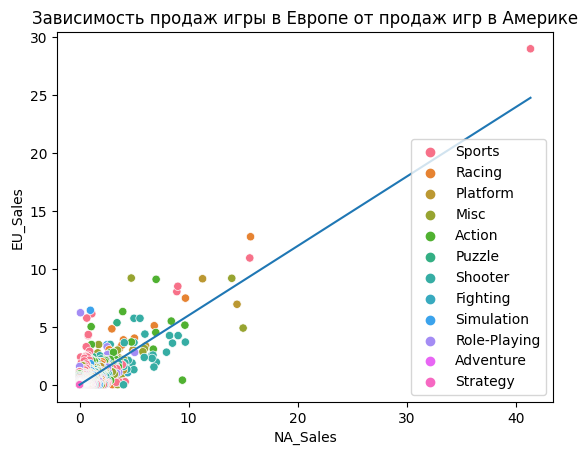

In [9]:
sns.scatterplot(data=df_games, x="NA_Sales", y="EU_Sales", hue="Genre")
sns.lineplot(data=df_games, x='NA_Sales', y='Approcs')
plt.title("Зависимость продаж игры в Европе от продаж игр в Америке")

**Проверить все численные столбцы на соответствие ЦПТ.**

In [10]:
# Определяем столбцы с числовыми данными
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
 16  Approcs          6825 non-null   float64
dtypes: float64(11

Text(0.5, 1.0, 'Year_of_Release')

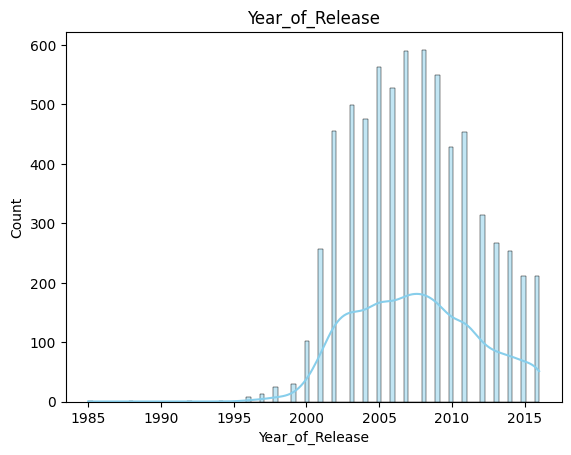

In [11]:
sns.histplot(data=df_games['Year_of_Release'], bins=100, kde=True, color="skyblue")
plt.title("Year_of_Release")

Text(0.5, 1.0, 'NA_Sales')

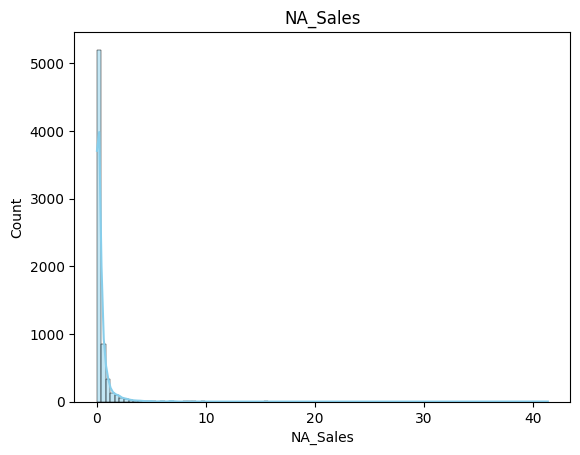

In [12]:
sns.histplot(data=df_games['NA_Sales'], bins=100, kde=True, color="skyblue")
plt.title("NA_Sales")

Text(0.5, 1.0, 'EU_Sales')

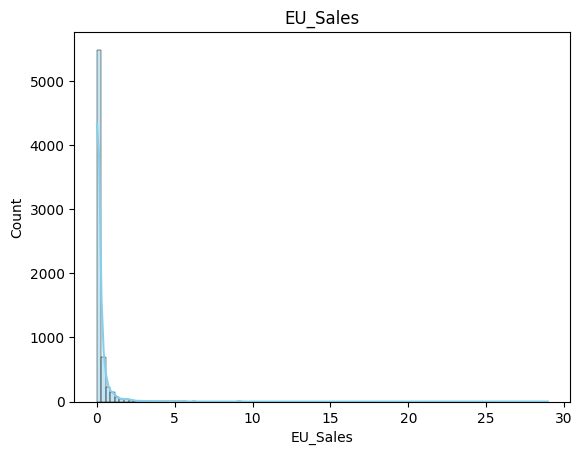

In [13]:
sns.histplot(data=df_games['EU_Sales'], bins=100, kde=True, color="skyblue")
plt.title("EU_Sales")

Text(0.5, 1.0, 'JP_Sales')

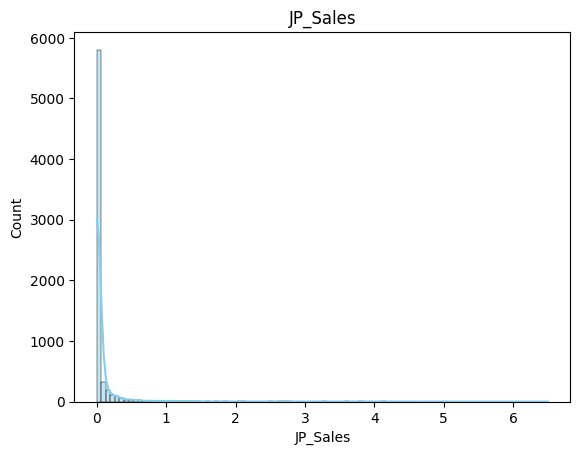

In [14]:
sns.histplot(data=df_games['JP_Sales'], bins=100, kde=True, color="skyblue")
plt.title("JP_Sales")

Text(0.5, 1.0, 'Other_Sales')

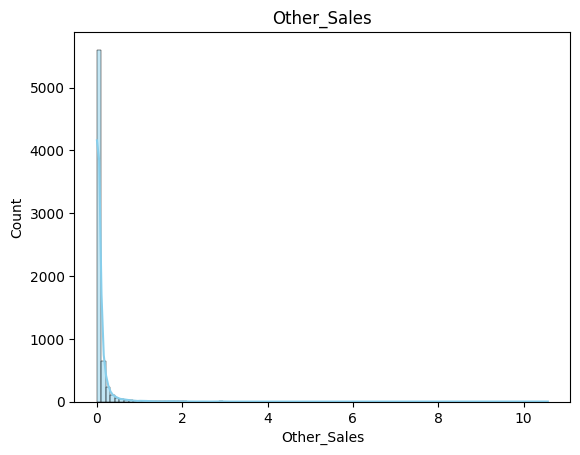

In [16]:
sns.histplot(data=df_games['Other_Sales'], bins=100, kde=True, color="skyblue")
plt.title("Other_Sales")

Text(0.5, 1.0, 'Global_Sales')

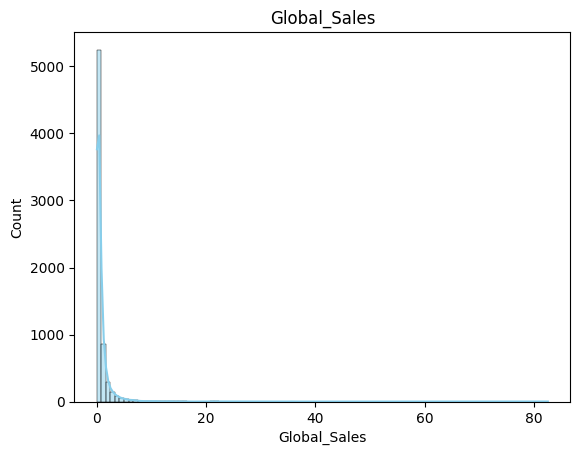

In [17]:
sns.histplot(data=df_games['Global_Sales'], bins=100, kde=True, color="skyblue")
plt.title("Global_Sales")

Text(0.5, 1.0, 'Critic_Score')

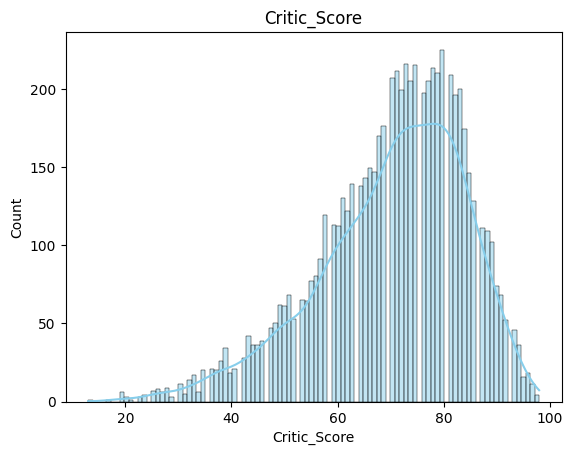

In [18]:
sns.histplot(data=df_games['Critic_Score'], bins=100, kde=True, color="skyblue")
plt.title("Critic_Score")

Text(0.5, 1.0, 'Critic_Count')

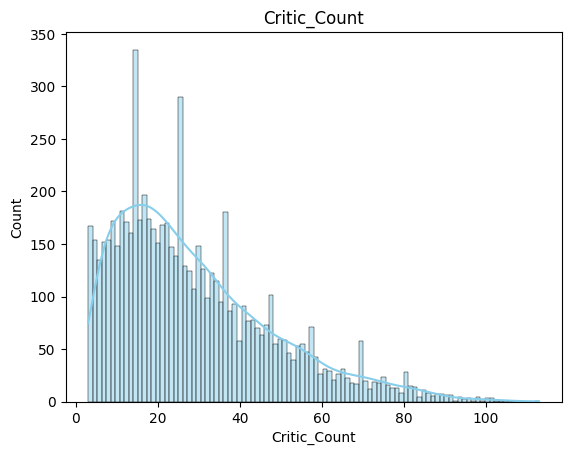

In [19]:
sns.histplot(data=df_games['Critic_Count'], bins=100, kde=True, color="skyblue")
plt.title("Critic_Count")

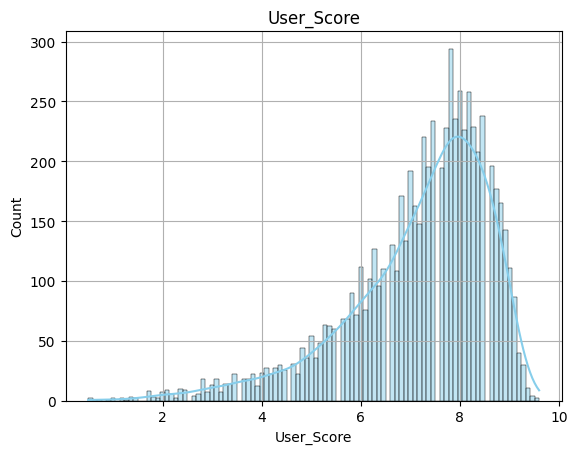

In [52]:
sns.histplot(data=df_games['User_Score'], bins=100, kde=True, color="skyblue")
plt.title("User_Score")
plt.grid()


<Figure size 300x6000 with 0 Axes>

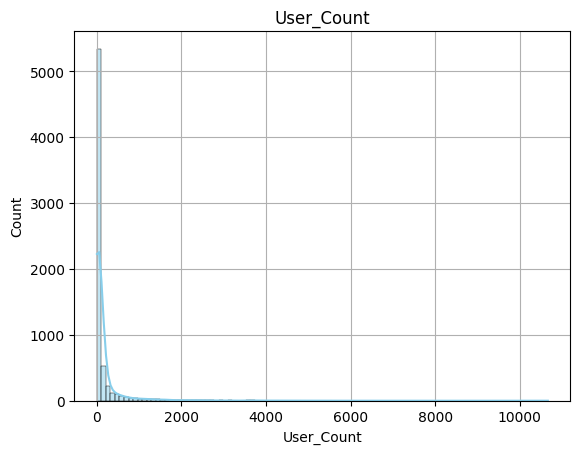

<Figure size 300x6000 with 0 Axes>

In [54]:
sns.histplot(data=df_games['User_Count'], bins=100, kde=True, color="skyblue")
plt.title("User_Count")
plt.grid()

Вывод: наиболее соответствующими ЦПТ являются данные столбов "Critic_Score" и "User_Score"

**Построение тепловой карты**

<Axes: >

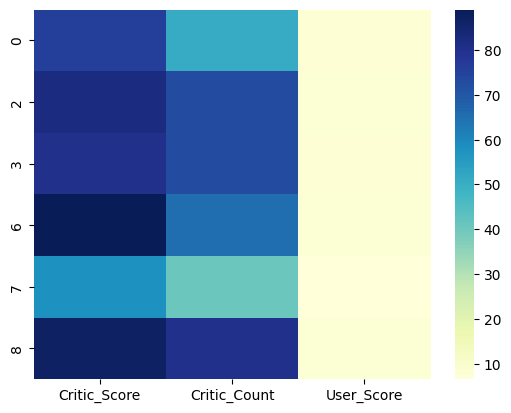

In [34]:
sns.heatmap(df_games[['Critic_Score', 'Critic_Count', 'User_Score']].loc[:10], annot=False, cmap="YlGnBu")

**Построение скрипичных графиков и столбчатых диаграмм**

При построении скрипичных графиков ось Х будет соответствовать жанрам (Genre) игр

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Racing'),
  Text(2, 0, 'Platform'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Role-Playing')])

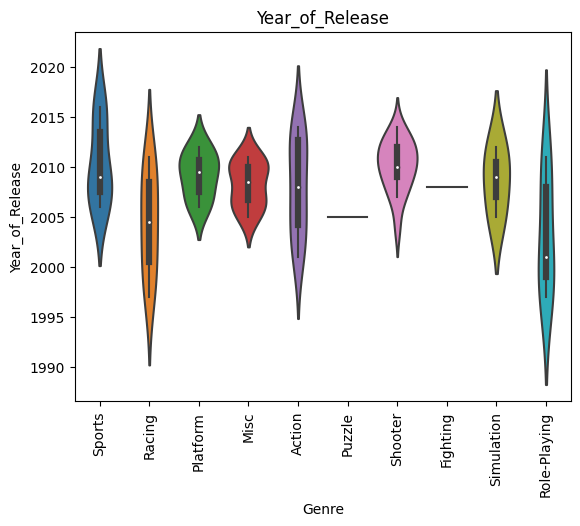

In [61]:
sns.violinplot(x='Genre', y='Year_of_Release', data=df_games.loc[:100])
plt.title('Year_of_Release')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Racing'),
  Text(2, 0, 'Platform'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Role-Playing')])

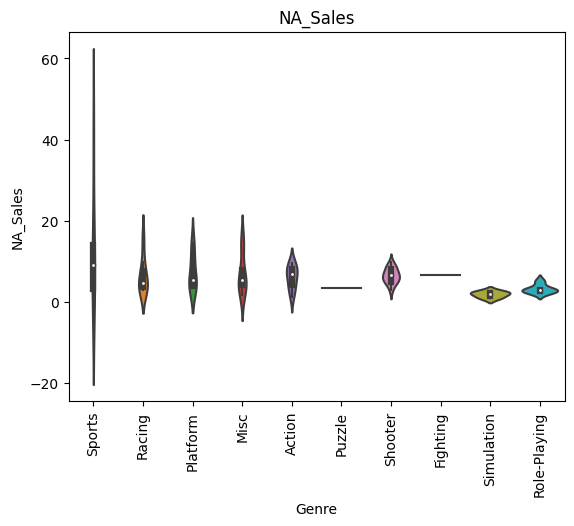

In [60]:
sns.violinplot(x='Genre', y='NA_Sales', data=df_games.loc[:100])
plt.title('NA_Sales')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Racing'),
  Text(2, 0, 'Platform'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Role-Playing')])

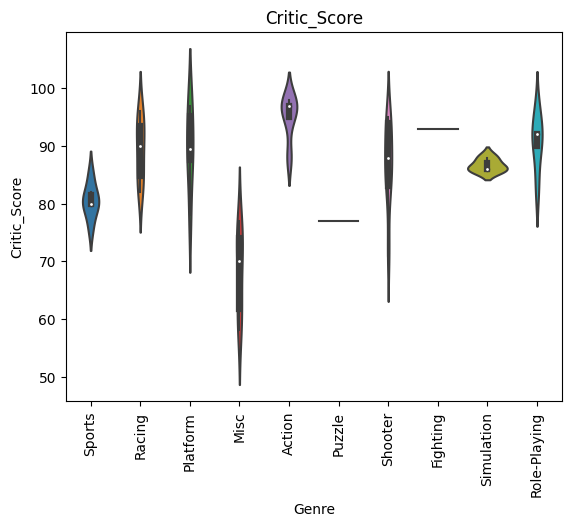

In [59]:
sns.violinplot(x='Genre', y='Critic_Score', data=df_games.loc[:100])
plt.title('Critic_Score')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Racing'),
  Text(2, 0, 'Platform'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Role-Playing')])

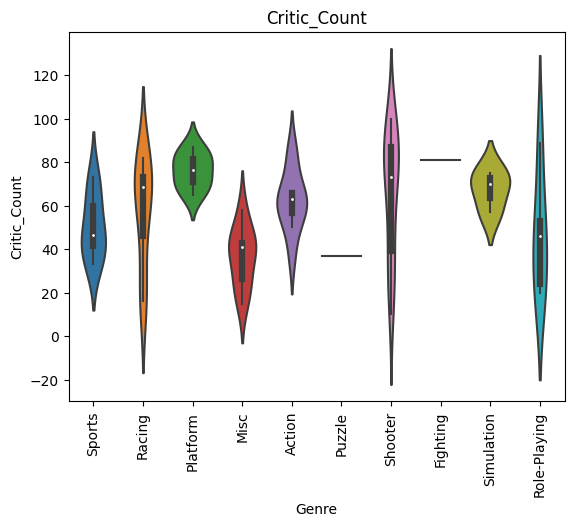

In [58]:
sns.violinplot(x='Genre', y='Critic_Count', data=df_games.loc[:100])
plt.title('Critic_Count')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Racing'),
  Text(2, 0, 'Platform'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Role-Playing')])

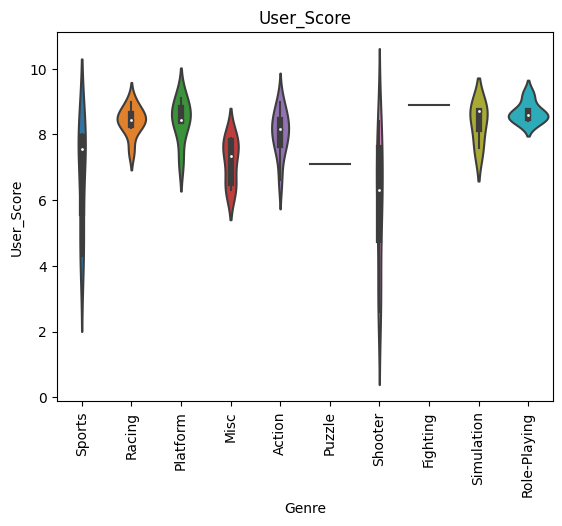

In [57]:
sns.violinplot(x='Genre', y='User_Score', data=df_games.loc[:100])
plt.title('User_Score')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Racing'),
  Text(2, 0, 'Platform'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Role-Playing')])

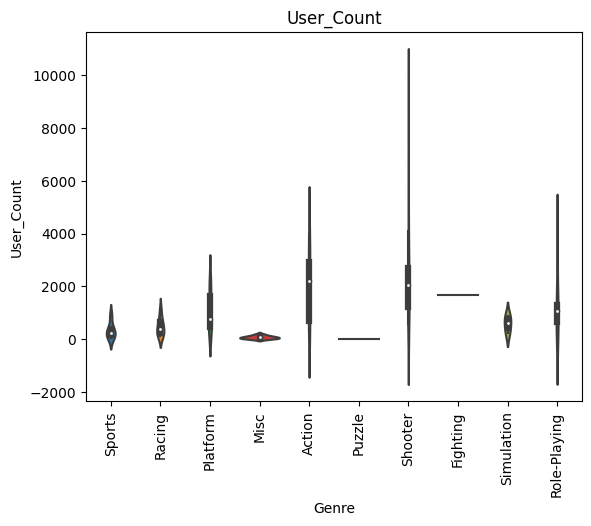

In [56]:
sns.violinplot(x='Genre', y='User_Count', data=df_games.loc[:100])
plt.title('User_Count')
plt.xticks(rotation=90)

Для примера выведем также процент продаж игр по жанрам для выборки из первых 10 значений на круговой диаграмме и для 100 значений - на столбчатой диаграмме

([<matplotlib.patches.Wedge at 0x7d7140384670>,
 [Text(-1.0166023437061777, -0.42014244580987836, 'Sports'),
  Text(0.4082983984060921, -1.0214168678159865, 'Racing'),
  Text(1.0545201034802403, -0.3130293138925227, 'Sports'),
  Text(0.9446943777875306, 0.5635179966750223, 'Platform'),
  Text(0.2800130576328053, 1.0637634546999288, 'Misc'),
  Text(-0.5260363670792632, 0.9660671511391178, 'Platform')],
 [Text(-0.5545103692942788, -0.22916860680538814, '34.7%'),
  Text(0.22270821731241386, -0.5571364733541744, '14.9%'),
  Text(0.5751927837164946, -0.17074326212319418, '13.8%'),
  Text(0.515287842429562, 0.30737345273183037, '12.5%'),
  Text(0.15273439507243924, 0.5802346116545065, '12.2%'),
  Text(-0.2869289274977799, 0.5269457188031551, '11.9%')])

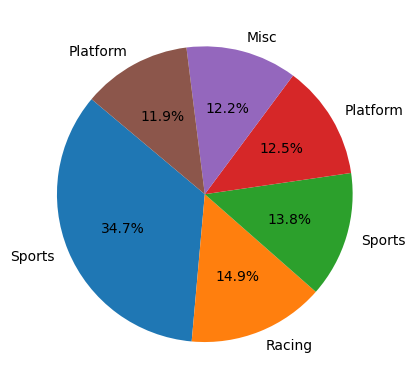

In [67]:
plt.pie(df_games['Global_Sales'].loc[:10], labels=df_games['Genre'].loc[:10], autopct='%1.1f%%', startangle=140)

Text(0.5, 1.0, 'Global_Sales')

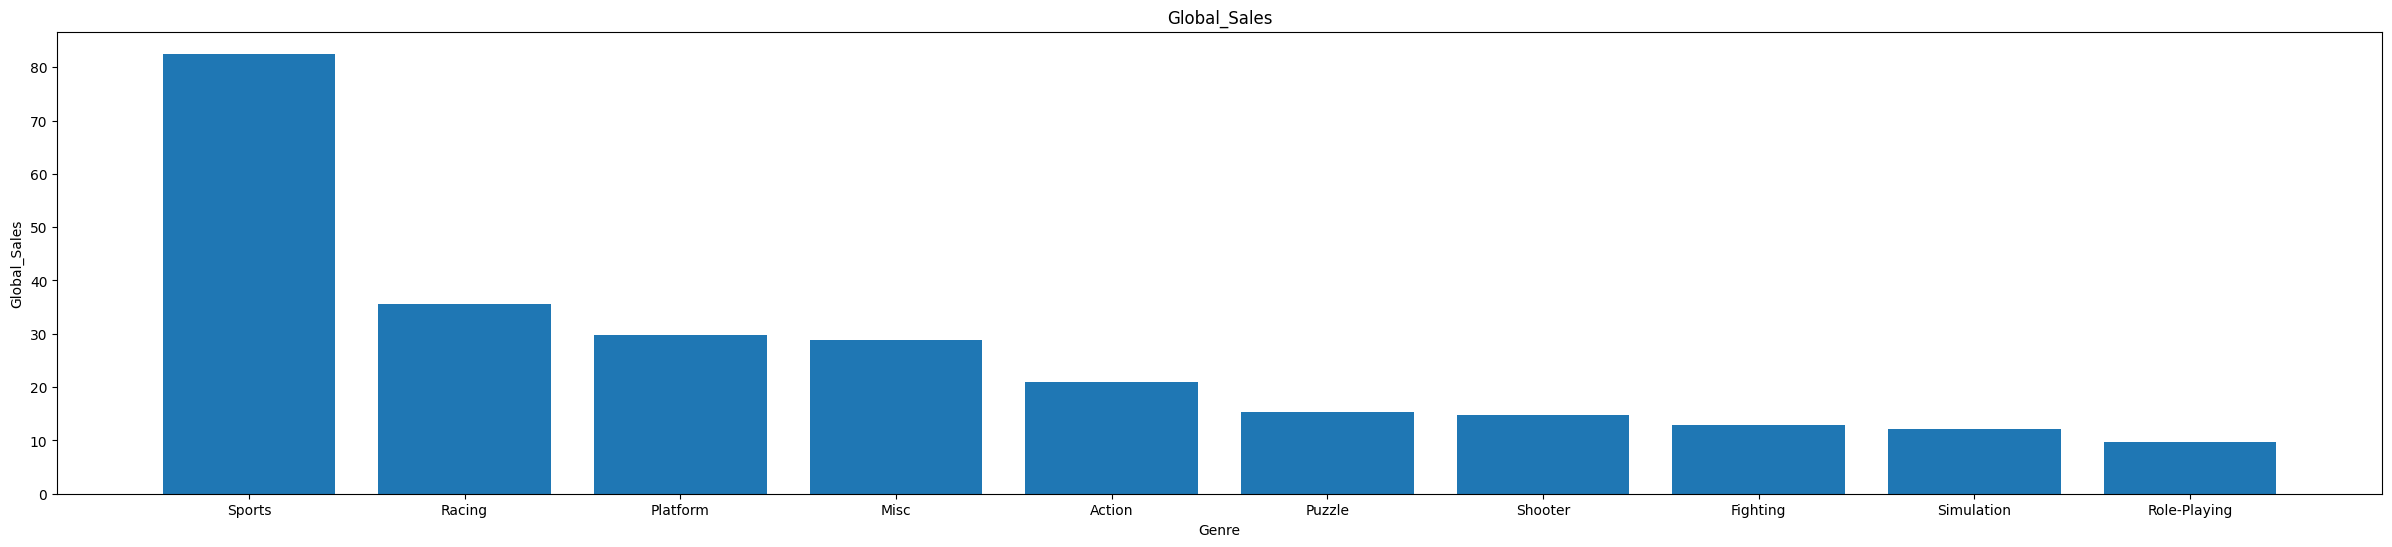

In [77]:
plt.figure(figsize=(30, 6))
plt.bar(df_games['Genre'].loc[:100], df_games['Global_Sales'].loc[:100])
plt.xlabel('Genre')
plt.ylabel('Global_Sales')
plt.title('Global_Sales')


In [35]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
 16  Approcs          6825 non-null   float64
dtypes: float64(11